In [1]:
%pylab --no-import-all notebook
from math import sqrt, factorial, isnan
import warnings
from sympy.utilities.iterables import multiset_permutations
from hmmlearn.hmm import GaussianHMM
import pandas as pd
import itertools as it
import Classification as CL
import os
import time
from copy import copy
way = os.getcwd() + "/Data_npy/"
way1 = way + "Chosen ones/"
valid_path = os.getcwd() + "/Validační tabulky/"

Populating the interactive namespace from numpy and matplotlib


In [2]:
trlist = np.load(way + "new_seznam.npy").tolist()
trlist

['No116.npy',
 'No101.npy',
 'No100.npy',
 'No128.npy',
 'No221.npy',
 'No127.npy',
 'No104.npy',
 'No222.npy',
 'No106.npy',
 'No218.npy']

<IPython.core.display.Javascript object>


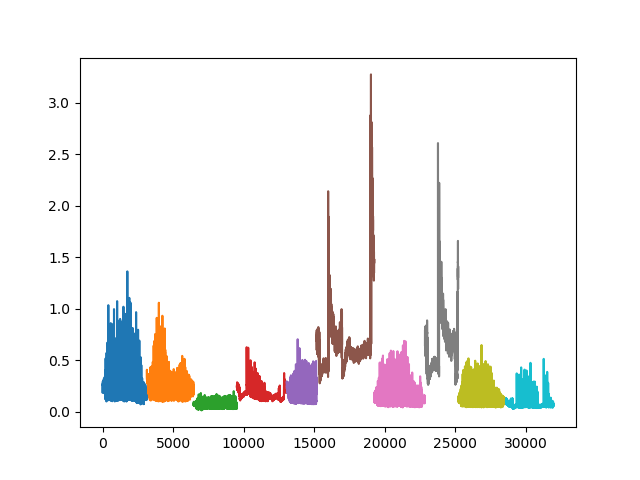

In [3]:
tmp = [np.load(way1 + d)[1] for d in trlist]
plt.figure("Vybraná reálná data")
posun = 0
for i in tmp:
    plt.plot(np.arange(len(i))+ posun, i)
    posun = posun +len(i) 
plt.show()

<IPython.core.display.Javascript object>


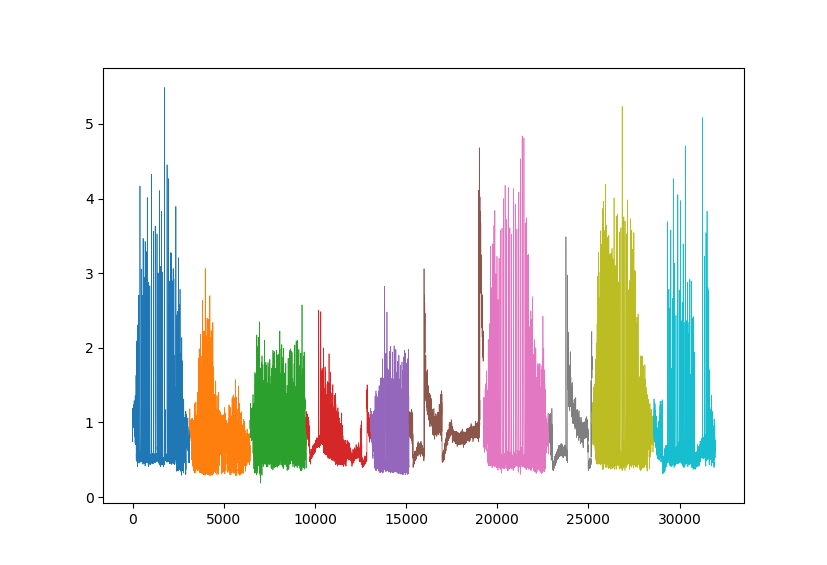

In [5]:
norma = [CL.normalization(np.load(way1 + d)[1] , delka_useku = 20, training_set = True) for d in trlist]
plt.figure("Vybraná reálná data po normalizaci")
posun = 0
for i in norma:
    plt.plot(np.arange(len(i))+ posun, i, lw = 0.5)
    posun = posun +len(i) 
plt.show()

In [34]:
train_data = []
for data in trlist:
    train_data.append(np.load(way1 + data))

In [35]:
valid_tab = []
for i in range(1,11):
    valid_tab.append(pd.read_csv(valid_path + "Real_data_HMM_" + str(i) + ".csv"))

In [36]:
Sorted_tab = []
for val in valid_tab:
    Sorted_tab.append(val.sort_values(['Accuracy'], ascending=False))

In [43]:
Sorted_tab[0].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2342,"(1, 0, 0, 1, 0)","(0, 10, 12, 9)",0.780916,737,0.898501,0.617647,0.685590,0.733912,0.921893,0.451844,0.899713,0.876265,0.975664,0.553792
2249,"(1, 0, 0, 1, 0)","(0, 10, 12, 6)",0.780916,737,0.898501,0.617647,0.685590,0.733912,0.921893,0.451844,0.899713,0.876265,0.975664,0.553792
2435,"(1, 0, 0, 1, 0)","(0, 10, 12, 12)",0.780916,737,0.898501,0.617647,0.685590,0.733912,0.921893,0.451844,0.899713,0.876265,0.975664,0.553792
2373,"(1, 0, 0, 1, 0)","(0, 10, 12, 10)",0.780916,737,0.898501,0.617647,0.685590,0.733912,0.921893,0.451844,0.899713,0.876265,0.975664,0.553792
2404,"(1, 0, 0, 1, 0)","(0, 10, 12, 11)",0.780916,737,0.898501,0.617647,0.685590,0.733912,0.921893,0.451844,0.899713,0.876265,0.975664,0.553792
2497,"(1, 0, 0, 1, 0)","(0, 10, 12, 14)",0.780916,737,0.898501,0.617647,0.685590,0.733912,0.921893,0.451844,0.899713,0.876265,0.975664,0.553792
2466,"(1, 0, 0, 1, 0)","(0, 10, 12, 13)",0.780916,737,0.898501,0.617647,0.685590,0.733912,0.921893,0.451844,0.899713,0.876265,0.975664,0.553792
2311,"(1, 0, 0, 1, 0)","(0, 10, 12, 8)",0.780916,737,0.898501,0.617647,0.685590,0.733912,0.921893,0.451844,0.899713,0.876265,0.975664,0.553792
2280,"(1, 0, 0, 1, 0)","(0, 10, 12, 7)",0.780916,737,0.898501,0.617647,0.685590,0.733912,0.921893,0.451844,0.899713,0.876265,0.975664,0.553792
2574,"(0, 0, 0, 1, 0)","(0, 10, 14, 8)",0.779727,741,0.895303,0.617080,0.680827,0.731070,0.900911,0.448000,0.975329,0.889764,0.991150,0.522928


In [44]:
Sorted_tab[1].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
127,"(0, 0, 1, 0, 0)","(0, 0, 12, 10)",0.791851,705,0.880674,0.747596,0.692991,0.773754,0.836207,0.657505,0.859241,0.930137,0.866295,0.580645
251,"(0, 0, 1, 0, 0)","(0, 0, 12, 14)",0.791851,705,0.880674,0.747596,0.692991,0.773754,0.836207,0.657505,0.859241,0.930137,0.866295,0.580645
189,"(0, 0, 1, 0, 0)","(0, 0, 12, 12)",0.791851,705,0.880674,0.747596,0.692991,0.773754,0.836207,0.657505,0.859241,0.930137,0.866295,0.580645
3,"(0, 0, 1, 0, 0)","(0, 0, 12, 6)",0.791851,705,0.880674,0.747596,0.692991,0.773754,0.836207,0.657505,0.859241,0.930137,0.866295,0.580645
34,"(0, 0, 1, 0, 0)","(0, 0, 12, 7)",0.791851,705,0.880674,0.747596,0.692991,0.773754,0.836207,0.657505,0.859241,0.930137,0.866295,0.580645
96,"(0, 0, 1, 0, 0)","(0, 0, 12, 9)",0.791851,705,0.880674,0.747596,0.692991,0.773754,0.836207,0.657505,0.859241,0.930137,0.866295,0.580645
158,"(0, 0, 1, 0, 0)","(0, 0, 12, 11)",0.791851,705,0.880674,0.747596,0.692991,0.773754,0.836207,0.657505,0.859241,0.930137,0.866295,0.580645
220,"(0, 0, 1, 0, 0)","(0, 0, 12, 13)",0.791851,705,0.880674,0.747596,0.692991,0.773754,0.836207,0.657505,0.859241,0.930137,0.866295,0.580645
65,"(0, 0, 1, 0, 0)","(0, 0, 12, 8)",0.791851,705,0.880674,0.747596,0.692991,0.773754,0.836207,0.657505,0.859241,0.930137,0.866295,0.580645
5286,"(1, 0, 0, 0, 1)","(4, 8, 16, 14)",0.789489,713,0.847629,0.656250,0.819974,0.774618,0.898695,0.561386,0.871508,0.802055,0.789694,0.774194


In [45]:
Sorted_tab[2].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
8122,"(0, 0, 0, 0, 1)","(6, 8, 14, 7)",0.917233,195,0.983351,0.927907,0.180952,0.697403,0.968238,0.990894,0.110465,0.998943,0.872449,0.5
868,"(0, 0, 0, 0, 1)","(0, 8, 0, 7)",0.917233,195,0.983351,0.927907,0.180952,0.697403,0.968238,0.990894,0.110465,0.998943,0.872449,0.5
6448,"(0, 0, 0, 0, 1)","(6, 0, 0, 7)",0.917233,195,0.983351,0.927907,0.180952,0.697403,0.968238,0.990894,0.110465,0.998943,0.872449,0.5
3100,"(0, 0, 0, 0, 1)","(4, 0, 0, 7)",0.917233,195,0.983351,0.927907,0.180952,0.697403,0.968238,0.990894,0.110465,0.998943,0.872449,0.5
6169,"(0, 0, 0, 0, 1)","(4, 10, 16, 7)",0.917233,195,0.983351,0.927907,0.180952,0.697403,0.968238,0.990894,0.110465,0.998943,0.872449,0.5
5890,"(0, 0, 0, 0, 1)","(4, 10, 14, 7)",0.917233,195,0.983351,0.927907,0.180952,0.697403,0.968238,0.990894,0.110465,0.998943,0.872449,0.5
5611,"(0, 0, 0, 0, 1)","(4, 10, 12, 7)",0.917233,195,0.983351,0.927907,0.180952,0.697403,0.968238,0.990894,0.110465,0.998943,0.872449,0.5
1147,"(0, 0, 0, 0, 1)","(0, 8, 12, 7)",0.917233,195,0.983351,0.927907,0.180952,0.697403,0.968238,0.990894,0.110465,0.998943,0.872449,0.5
9517,"(0, 0, 0, 0, 1)","(6, 10, 16, 7)",0.917233,195,0.983351,0.927907,0.180952,0.697403,0.968238,0.990894,0.110465,0.998943,0.872449,0.5
8959,"(0, 0, 0, 0, 1)","(6, 10, 12, 7)",0.917233,195,0.983351,0.927907,0.180952,0.697403,0.968238,0.990894,0.110465,0.998943,0.872449,0.5


In [46]:
Sorted_tab[3].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2396,"(0, 1, 0, 1, 0)","(0, 10, 12, 11)",0.807286,693,0.875713,0.599070,0.801073,0.758619,0.949907,0.500000,0.782772,0.812269,0.747100,0.820251
2458,"(0, 1, 0, 1, 0)","(0, 10, 12, 13)",0.807286,693,0.875713,0.599070,0.801073,0.758619,0.949907,0.500000,0.782772,0.812269,0.747100,0.820251
2427,"(0, 1, 0, 1, 0)","(0, 10, 12, 12)",0.807286,693,0.875713,0.599070,0.801073,0.758619,0.949907,0.500000,0.782772,0.812269,0.747100,0.820251
2365,"(0, 1, 0, 1, 0)","(0, 10, 12, 10)",0.807286,693,0.875713,0.599070,0.801073,0.758619,0.949907,0.500000,0.782772,0.812269,0.747100,0.820251
2241,"(0, 1, 0, 1, 0)","(0, 10, 12, 6)",0.807286,693,0.875713,0.599070,0.801073,0.758619,0.949907,0.500000,0.782772,0.812269,0.747100,0.820251
2334,"(0, 1, 0, 1, 0)","(0, 10, 12, 9)",0.807286,693,0.875713,0.599070,0.801073,0.758619,0.949907,0.500000,0.782772,0.812269,0.747100,0.820251
2303,"(0, 1, 0, 1, 0)","(0, 10, 12, 8)",0.807286,693,0.875713,0.599070,0.801073,0.758619,0.949907,0.500000,0.782772,0.812269,0.747100,0.820251
2489,"(0, 1, 0, 1, 0)","(0, 10, 12, 14)",0.807286,693,0.875713,0.599070,0.801073,0.758619,0.949907,0.500000,0.782772,0.812269,0.747100,0.820251
2272,"(0, 1, 0, 1, 0)","(0, 10, 12, 7)",0.807286,693,0.875713,0.599070,0.801073,0.758619,0.949907,0.500000,0.782772,0.812269,0.747100,0.820251
2768,"(0, 1, 0, 1, 0)","(0, 10, 14, 14)",0.803393,707,0.871109,0.580977,0.813756,0.755280,0.968305,0.460598,0.801370,0.791645,0.786543,0.826531


In [47]:
Sorted_tab[4].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2777,"(1, 0, 0, 1, 1)","(0, 10, 14, 14)",0.970329,121,0.986590,0.957563,0.692737,0.878963,0.996132,0.946915,0.626263,0.977230,0.968452,0.7750
1630,"(1, 0, 0, 1, 1)","(0, 8, 14, 13)",0.969593,124,0.986207,0.956553,0.678161,0.873640,0.995745,0.944246,0.627660,0.976850,0.969186,0.7375
1359,"(1, 1, 0, 1, 1)","(0, 8, 12, 13)",0.968857,127,0.986034,0.958515,0.629834,0.858128,0.994213,0.950903,0.564356,0.977989,0.966251,0.7125
2810,"(1, 0, 1, 0, 1)","(0, 10, 16, 6)",0.968857,127,0.987617,0.955419,0.554054,0.832363,0.991584,0.944126,0.602941,0.983681,0.966985,0.5125
2407,"(1, 0, 1, 0, 1)","(0, 10, 12, 11)",0.968367,129,0.987419,0.954229,0.625698,0.855782,0.991957,0.952485,0.565657,0.982922,0.955979,0.7000
2585,"(0, 1, 1, 0, 1)","(0, 10, 14, 8)",0.967876,131,0.986646,0.956144,0.541935,0.828242,0.991945,0.944842,0.560000,0.981404,0.967718,0.5250
3529,"(1, 1, 0, 1, 1)","(4, 0, 12, 11)",0.967876,131,0.985856,0.957153,0.588235,0.843748,0.993069,0.947520,0.555556,0.978748,0.966985,0.6250
7336,"(1, 0, 1, 0, 1)","(6, 0, 16, 8)",0.967631,132,0.986396,0.953990,0.580645,0.840344,0.996130,0.935166,0.600000,0.976850,0.973588,0.5625
7150,"(1, 0, 1, 0, 1)","(6, 0, 14, 11)",0.967631,132,0.986784,0.953623,0.617143,0.852517,0.996133,0.942019,0.568421,0.977609,0.965517,0.6750
2808,"(1, 0, 0, 1, 1)","(0, 10, 16, 6)",0.967631,132,0.987043,0.953902,0.549020,0.829988,0.991198,0.943966,0.575342,0.982922,0.964050,0.5250


In [48]:
Sorted_tab[5].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2388,"(0, 0, 0, 1, 0)","(0, 10, 12, 11)",0.799149,425,0.865044,0.665188,0.800263,0.776832,0.882619,0.560748,0.876259,0.848156,0.817439,0.736397
2450,"(0, 0, 0, 1, 0)","(0, 10, 12, 13)",0.799149,425,0.865044,0.665188,0.800263,0.776832,0.882619,0.560748,0.876259,0.848156,0.817439,0.736397
2233,"(0, 0, 0, 1, 0)","(0, 10, 12, 6)",0.799149,425,0.865044,0.665188,0.800263,0.776832,0.882619,0.560748,0.876259,0.848156,0.817439,0.736397
2419,"(0, 0, 0, 1, 0)","(0, 10, 12, 12)",0.799149,425,0.865044,0.665188,0.800263,0.776832,0.882619,0.560748,0.876259,0.848156,0.817439,0.736397
2357,"(0, 0, 0, 1, 0)","(0, 10, 12, 10)",0.799149,425,0.865044,0.665188,0.800263,0.776832,0.882619,0.560748,0.876259,0.848156,0.817439,0.736397
2481,"(0, 0, 0, 1, 0)","(0, 10, 12, 14)",0.799149,425,0.865044,0.665188,0.800263,0.776832,0.882619,0.560748,0.876259,0.848156,0.817439,0.736397
2326,"(0, 0, 0, 1, 0)","(0, 10, 12, 9)",0.799149,425,0.865044,0.665188,0.800263,0.776832,0.882619,0.560748,0.876259,0.848156,0.817439,0.736397
2264,"(0, 0, 0, 1, 0)","(0, 10, 12, 7)",0.799149,425,0.865044,0.665188,0.800263,0.776832,0.882619,0.560748,0.876259,0.848156,0.817439,0.736397
2295,"(0, 0, 0, 1, 0)","(0, 10, 12, 8)",0.799149,425,0.865044,0.665188,0.800263,0.776832,0.882619,0.560748,0.876259,0.848156,0.817439,0.736397
188,"(0, 0, 0, 1, 1)","(0, 0, 12, 12)",0.794423,435,0.873102,0.664474,0.776423,0.771333,0.873102,0.555963,0.882897,0.873102,0.825613,0.692866


In [49]:
Sorted_tab[6].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
7984,"(1, 0, 0, 1, 0)","(6, 8, 12, 11)",0.597395,1422,0.615061,0.503486,0.735849,0.618132,0.495206,0.587832,0.922297,0.811460,0.440308,0.612108
8488,"(1, 1, 0, 1, 0)","(6, 8, 16, 9)",0.597395,1422,0.631433,0.513011,0.683578,0.609341,0.506132,0.609541,0.844884,0.839187,0.442875,0.573991
8550,"(1, 1, 0, 1, 0)","(6, 8, 16, 11)",0.597395,1422,0.631433,0.513011,0.683578,0.609341,0.506132,0.609541,0.844884,0.839187,0.442875,0.573991
7891,"(1, 0, 0, 1, 0)","(6, 8, 12, 8)",0.597395,1422,0.615061,0.503486,0.735849,0.618132,0.495206,0.587832,0.922297,0.811460,0.440308,0.612108
8519,"(1, 1, 0, 1, 0)","(6, 8, 16, 10)",0.597395,1422,0.631433,0.513011,0.683578,0.609341,0.506132,0.609541,0.844884,0.839187,0.442875,0.573991
8077,"(1, 0, 0, 1, 0)","(6, 8, 12, 14)",0.597395,1422,0.615061,0.503486,0.735849,0.618132,0.495206,0.587832,0.922297,0.811460,0.440308,0.612108
7829,"(1, 0, 0, 1, 0)","(6, 8, 12, 6)",0.597395,1422,0.615061,0.503486,0.735849,0.618132,0.495206,0.587832,0.922297,0.811460,0.440308,0.612108
8581,"(1, 1, 0, 1, 0)","(6, 8, 16, 12)",0.597395,1422,0.631433,0.513011,0.683578,0.609341,0.506132,0.609541,0.844884,0.839187,0.442875,0.573991
8395,"(1, 1, 0, 1, 0)","(6, 8, 16, 6)",0.597395,1422,0.631433,0.513011,0.683578,0.609341,0.506132,0.609541,0.844884,0.839187,0.442875,0.573991
7922,"(1, 0, 0, 1, 0)","(6, 8, 12, 9)",0.597395,1422,0.615061,0.503486,0.735849,0.618132,0.495206,0.587832,0.922297,0.811460,0.440308,0.612108


In [50]:
Sorted_tab[7].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2502,"(1, 0, 1, 1, 1)","(0, 10, 12, 14)",0.720612,858,0.753853,0.418462,0.796271,0.656195,0.701639,0.368897,0.888290,0.814462,0.483412,0.721527
7518,"(1, 0, 0, 0, 1)","(6, 0, 16, 14)",0.720287,859,0.745255,0.470782,0.806838,0.674291,0.784437,0.360656,0.889224,0.709800,0.677725,0.738423
5007,"(1, 0, 0, 0, 1)","(4, 8, 14, 14)",0.720287,859,0.745255,0.470782,0.806838,0.674291,0.784437,0.360656,0.889224,0.709800,0.677725,0.738423
2217,"(1, 0, 0, 0, 1)","(0, 10, 0, 14)",0.720287,859,0.745255,0.470782,0.806838,0.674291,0.784437,0.360656,0.889224,0.709800,0.677725,0.738423
8355,"(1, 0, 0, 0, 1)","(6, 8, 14, 14)",0.720287,859,0.745255,0.470782,0.806838,0.674291,0.784437,0.360656,0.889224,0.709800,0.677725,0.738423
4170,"(1, 0, 0, 0, 1)","(4, 0, 16, 14)",0.720287,859,0.745255,0.470782,0.806838,0.674291,0.784437,0.360656,0.889224,0.709800,0.677725,0.738423
3612,"(1, 0, 0, 0, 1)","(4, 0, 12, 14)",0.720287,859,0.745255,0.470782,0.806838,0.674291,0.784437,0.360656,0.889224,0.709800,0.677725,0.738423
8913,"(1, 0, 0, 0, 1)","(6, 10, 0, 14)",0.720287,859,0.745255,0.470782,0.806838,0.674291,0.784437,0.360656,0.889224,0.709800,0.677725,0.738423
6960,"(1, 0, 0, 0, 1)","(6, 0, 12, 14)",0.720287,859,0.745255,0.470782,0.806838,0.674291,0.784437,0.360656,0.889224,0.709800,0.677725,0.738423
3054,"(1, 0, 0, 0, 1)","(0, 10, 16, 14)",0.720287,859,0.745255,0.470782,0.806838,0.674291,0.784437,0.360656,0.889224,0.709800,0.677725,0.738423


In [51]:
Sorted_tab[8].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2334,"(0, 1, 0, 1, 0)","(0, 10, 12, 9)",0.690634,1024,0.382627,0.768421,0.714122,0.621723,0.604575,0.693175,0.707354,0.279879,0.861993,0.721020
2365,"(0, 1, 0, 1, 0)","(0, 10, 12, 10)",0.690634,1024,0.382627,0.768421,0.714122,0.621723,0.604575,0.693175,0.707354,0.279879,0.861993,0.721020
2396,"(0, 1, 0, 1, 0)","(0, 10, 12, 11)",0.690634,1024,0.382627,0.768421,0.714122,0.621723,0.604575,0.693175,0.707354,0.279879,0.861993,0.721020
2303,"(0, 1, 0, 1, 0)","(0, 10, 12, 8)",0.690634,1024,0.382627,0.768421,0.714122,0.621723,0.604575,0.693175,0.707354,0.279879,0.861993,0.721020
2241,"(0, 1, 0, 1, 0)","(0, 10, 12, 6)",0.690634,1024,0.382627,0.768421,0.714122,0.621723,0.604575,0.693175,0.707354,0.279879,0.861993,0.721020
2427,"(0, 1, 0, 1, 0)","(0, 10, 12, 12)",0.690634,1024,0.382627,0.768421,0.714122,0.621723,0.604575,0.693175,0.707354,0.279879,0.861993,0.721020
2272,"(0, 1, 0, 1, 0)","(0, 10, 12, 7)",0.690634,1024,0.382627,0.768421,0.714122,0.621723,0.604575,0.693175,0.707354,0.279879,0.861993,0.721020
2489,"(0, 1, 0, 1, 0)","(0, 10, 12, 14)",0.690634,1024,0.382627,0.768421,0.714122,0.621723,0.604575,0.693175,0.707354,0.279879,0.861993,0.721020
2458,"(0, 1, 0, 1, 0)","(0, 10, 12, 13)",0.690634,1024,0.382627,0.768421,0.714122,0.621723,0.604575,0.693175,0.707354,0.279879,0.861993,0.721020
2404,"(1, 0, 0, 1, 0)","(0, 10, 12, 11)",0.684592,1044,0.398398,0.751249,0.717341,0.622330,0.588757,0.684466,0.709215,0.301059,0.832472,0.725657


In [52]:
Sorted_tab[9].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2698,"(0, 0, 0, 1, 0)","(0, 10, 14, 12)",0.860828,437,0.899801,0.875614,0.794521,0.856645,0.878238,0.940246,0.790652,0.922449,0.819296,0.798427
2605,"(0, 0, 0, 1, 0)","(0, 10, 14, 9)",0.860828,437,0.899801,0.875614,0.794521,0.856645,0.878238,0.940246,0.790652,0.922449,0.819296,0.798427
2760,"(0, 0, 0, 1, 0)","(0, 10, 14, 14)",0.860828,437,0.899801,0.875614,0.794521,0.856645,0.878238,0.940246,0.790652,0.922449,0.819296,0.798427
2574,"(0, 0, 0, 1, 0)","(0, 10, 14, 8)",0.860828,437,0.899801,0.875614,0.794521,0.856645,0.878238,0.940246,0.790652,0.922449,0.819296,0.798427
2729,"(0, 0, 0, 1, 0)","(0, 10, 14, 13)",0.860828,437,0.899801,0.875614,0.794521,0.856645,0.878238,0.940246,0.790652,0.922449,0.819296,0.798427
2543,"(0, 0, 0, 1, 0)","(0, 10, 14, 7)",0.860828,437,0.899801,0.875614,0.794521,0.856645,0.878238,0.940246,0.790652,0.922449,0.819296,0.798427
2512,"(0, 0, 0, 1, 0)","(0, 10, 14, 6)",0.860828,437,0.899801,0.875614,0.794521,0.856645,0.878238,0.940246,0.790652,0.922449,0.819296,0.798427
2636,"(0, 0, 0, 1, 0)","(0, 10, 14, 10)",0.860828,437,0.899801,0.875614,0.794521,0.856645,0.878238,0.940246,0.790652,0.922449,0.819296,0.798427
2667,"(0, 0, 0, 1, 0)","(0, 10, 14, 11)",0.860828,437,0.899801,0.875614,0.794521,0.856645,0.878238,0.940246,0.790652,0.922449,0.819296,0.798427
2745,"(1, 0, 0, 1, 0)","(0, 10, 14, 13)",0.860510,438,0.905313,0.858814,0.800186,0.854771,0.906548,0.944853,0.760177,0.904082,0.787136,0.844641


In [54]:
temp = list(valid_tab[0]["Kombinace rysů"])
temp1 = list(valid_tab[0]["délky úseku"])

In [61]:
tab_prumer = copy(valid_tab[0])
for i in valid_tab[1:]:
    tab_prumer = tab_prumer+i
    
tab_prumer = tab_prumer.drop("Kombinace rysů", axis =1)
tab_prumer = tab_prumer.drop("délky úseku", axis =1)
tab_prumer = tab_prumer/10
tab_prumer.insert(loc = 0, column = "délka úseku", value = temp1)
tab_prumer.insert(loc = 0, column = "Kombinace rysů", value = temp)
tab_prumer.head(10)

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
0,"(0, 0, 0, 0, 1)","(0, 0, 12, 6)",0.680112,1068.1,0.741988,0.641493,0.478301,0.620594,0.717394,0.583602,0.720552,0.833938,0.757423,0.421617
1,"(0, 0, 0, 1, 0)","(0, 0, 12, 6)",0.653202,1155.5,0.754084,0.591552,0.442354,0.595997,0.772354,0.504298,0.724052,0.784939,0.780266,0.433821
2,"(0, 0, 0, 1, 1)","(0, 0, 12, 6)",0.657332,1119.5,0.732214,0.557773,0.512943,0.600977,0.707364,0.517267,0.726624,0.811192,0.676406,0.475401
3,"(0, 0, 1, 0, 0)","(0, 0, 12, 6)",0.650836,1161.1,0.756540,0.593875,0.425279,0.591898,0.765108,0.510087,0.717806,0.800380,0.774207,0.411770
4,"(0, 0, 1, 0, 1)","(0, 0, 12, 6)",0.657449,1121.6,0.733424,0.566996,0.495865,0.598762,0.701366,0.526674,0.722989,0.823578,0.681566,0.446732
5,"(0, 0, 1, 1, 0)","(0, 0, 12, 6)",0.679894,1070.1,0.750113,0.603630,0.518189,0.623977,0.794372,0.517559,0.732861,0.752217,0.777448,0.528123
6,"(0, 0, 1, 1, 1)","(0, 0, 12, 6)",0.629972,1177.5,0.733808,0.479489,0.492268,0.568522,0.691195,0.450576,0.755660,0.821691,0.605030,0.408650
7,"(0, 1, 0, 0, 0)","(0, 0, 12, 6)",0.655066,1142.2,0.728744,0.639648,0.438193,0.602195,0.728316,0.573792,0.612576,0.783580,0.766056,0.424640
8,"(0, 1, 0, 0, 1)","(0, 0, 12, 6)",0.663431,1096.9,0.726302,0.585427,0.506983,0.606238,0.705703,0.539930,0.677381,0.789439,0.703185,0.467273
9,"(0, 1, 0, 1, 0)","(0, 0, 12, 6)",0.677741,1068.1,0.754792,0.606955,0.522929,0.628225,0.819442,0.520716,0.653472,0.736636,0.790645,0.543752


In [62]:
#tab_prumer.to_csv(valid_path + 'Cross_Fold_Modif_HMM.csv',index=False)

In [64]:
tab = pd.read_csv(valid_path + 'Cross_Fold_Modif_HMM.csv')

In [93]:
Sorted_Cross_Fold = tab.sort_values(['Accuracy'], ascending=False)
Sorted_Cross_Fold.head(20)

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
9154,"(0, 1, 0, 1, 0)","(6, 10, 12, 13)",0.733721,878.5,0.766422,0.637484,0.650601,0.684836,0.848260,0.564885,0.694361,0.725243,0.782062,0.672079
9092,"(0, 1, 0, 1, 0)","(6, 10, 12, 11)",0.733721,878.5,0.766422,0.637484,0.650601,0.684836,0.848260,0.564885,0.694361,0.725243,0.782062,0.672079
8937,"(0, 1, 0, 1, 0)","(6, 10, 12, 6)",0.733721,878.5,0.766422,0.637484,0.650601,0.684836,0.848260,0.564885,0.694361,0.725243,0.782062,0.672079
8968,"(0, 1, 0, 1, 0)","(6, 10, 12, 7)",0.733721,878.5,0.766422,0.637484,0.650601,0.684836,0.848260,0.564885,0.694361,0.725243,0.782062,0.672079
9061,"(0, 1, 0, 1, 0)","(6, 10, 12, 10)",0.733721,878.5,0.766422,0.637484,0.650601,0.684836,0.848260,0.564885,0.694361,0.725243,0.782062,0.672079
9123,"(0, 1, 0, 1, 0)","(6, 10, 12, 12)",0.733721,878.5,0.766422,0.637484,0.650601,0.684836,0.848260,0.564885,0.694361,0.725243,0.782062,0.672079
8999,"(0, 1, 0, 1, 0)","(6, 10, 12, 8)",0.733721,878.5,0.766422,0.637484,0.650601,0.684836,0.848260,0.564885,0.694361,0.725243,0.782062,0.672079
9185,"(0, 1, 0, 1, 0)","(6, 10, 12, 14)",0.733721,878.5,0.766422,0.637484,0.650601,0.684836,0.848260,0.564885,0.694361,0.725243,0.782062,0.672079
9030,"(0, 1, 0, 1, 0)","(6, 10, 12, 9)",0.733721,878.5,0.766422,0.637484,0.650601,0.684836,0.848260,0.564885,0.694361,0.725243,0.782062,0.672079
5682,"(0, 1, 0, 1, 0)","(4, 10, 12, 9)",0.728249,895.6,0.766036,0.629340,0.637711,0.677696,0.846914,0.552329,0.694673,0.726377,0.782143,0.646486


# odebrný problém

In [86]:
tab_prumer1 = copy(valid_tab[0])
k = 0
for i in valid_tab[1:]:
    if k ==6:
        k+=1
        continue
    tab_prumer1 = tab_prumer1+i
    k+=1
    
tab_prumer1 = tab_prumer1.drop("Kombinace rysů", axis =1)
tab_prumer1 = tab_prumer1.drop("délky úseku", axis =1)
tab_prumer1 = tab_prumer1/9
tab_prumer1.insert(loc = 0, column = "délka úseku", value = temp1)
tab_prumer1.insert(loc = 0, column = "Kombinace rysů", value = temp)
tab_prumer1.head(10)

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
0,"(0, 0, 0, 0, 1)","(0, 0, 12, 6)",0.689180,1049.777778,0.748759,0.658726,0.468675,0.625386,0.733530,0.607009,0.700992,0.833142,0.763909,0.422642
1,"(0, 0, 0, 1, 0)","(0, 0, 12, 6)",0.658122,1150.444444,0.754347,0.604488,0.431928,0.596921,0.785630,0.522852,0.700336,0.773729,0.777705,0.440305
2,"(0, 0, 0, 1, 1)","(0, 0, 12, 6)",0.666075,1100.111111,0.737555,0.573243,0.506870,0.605889,0.718405,0.541696,0.705547,0.814423,0.673100,0.482541
3,"(0, 0, 1, 0, 0)","(0, 0, 12, 6)",0.657085,1151.777778,0.757398,0.607683,0.417360,0.594147,0.779155,0.529763,0.693044,0.788772,0.771762,0.420045
4,"(0, 0, 1, 0, 1)","(0, 0, 12, 6)",0.666278,1102.222222,0.738754,0.581879,0.489631,0.603421,0.712565,0.550796,0.701844,0.826388,0.677253,0.452425
5,"(0, 0, 1, 1, 0)","(0, 0, 12, 6)",0.683366,1069.111111,0.751577,0.615982,0.503092,0.623550,0.807653,0.535816,0.708495,0.745618,0.773520,0.531457
6,"(0, 0, 1, 1, 1)","(0, 0, 12, 6)",0.637847,1157.888889,0.738142,0.490142,0.487226,0.571837,0.698068,0.471269,0.737434,0.826829,0.594583,0.411851
7,"(0, 1, 0, 0, 0)","(0, 0, 12, 6)",0.663666,1125.000000,0.734288,0.651925,0.432546,0.606253,0.746343,0.591085,0.597090,0.776449,0.771132,0.431563
8,"(0, 1, 0, 0, 1)","(0, 0, 12, 6)",0.672527,1076.000000,0.733985,0.598341,0.499668,0.610665,0.717202,0.562177,0.662168,0.796808,0.697062,0.470104
9,"(0, 1, 0, 1, 0)","(0, 0, 12, 6)",0.685930,1051.666667,0.756824,0.624077,0.517020,0.632640,0.831685,0.543117,0.637559,0.733380,0.791870,0.554037


In [87]:
#tab_prumer1.to_csv(valid_path + 'Cross_Fold_Modif_HMM1.csv',index=False)

In [88]:
tab1 = pd.read_csv(valid_path + 'Cross_Fold_Modif_HMM1.csv')

In [92]:
Sorted_Cross_Fold1 = tab1.sort_values(['Accuracy'], ascending=False)
Sorted_Cross_Fold1.head(25)

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
9154,"(0, 1, 0, 1, 0)","(6, 10, 12, 13)",0.740569,864.222222,0.772698,0.657103,0.641103,0.690301,0.858062,0.588849,0.681522,0.731822,0.793655,0.671799
9123,"(0, 1, 0, 1, 0)","(6, 10, 12, 12)",0.740569,864.222222,0.772698,0.657103,0.641103,0.690301,0.858062,0.588849,0.681522,0.731822,0.793655,0.671799
9061,"(0, 1, 0, 1, 0)","(6, 10, 12, 10)",0.740569,864.222222,0.772698,0.657103,0.641103,0.690301,0.858062,0.588849,0.681522,0.731822,0.793655,0.671799
9030,"(0, 1, 0, 1, 0)","(6, 10, 12, 9)",0.740569,864.222222,0.772698,0.657103,0.641103,0.690301,0.858062,0.588849,0.681522,0.731822,0.793655,0.671799
8999,"(0, 1, 0, 1, 0)","(6, 10, 12, 8)",0.740569,864.222222,0.772698,0.657103,0.641103,0.690301,0.858062,0.588849,0.681522,0.731822,0.793655,0.671799
9092,"(0, 1, 0, 1, 0)","(6, 10, 12, 11)",0.740569,864.222222,0.772698,0.657103,0.641103,0.690301,0.858062,0.588849,0.681522,0.731822,0.793655,0.671799
8968,"(0, 1, 0, 1, 0)","(6, 10, 12, 7)",0.740569,864.222222,0.772698,0.657103,0.641103,0.690301,0.858062,0.588849,0.681522,0.731822,0.793655,0.671799
8937,"(0, 1, 0, 1, 0)","(6, 10, 12, 6)",0.740569,864.222222,0.772698,0.657103,0.641103,0.690301,0.858062,0.588849,0.681522,0.731822,0.793655,0.671799
9185,"(0, 1, 0, 1, 0)","(6, 10, 12, 14)",0.740569,864.222222,0.772698,0.657103,0.641103,0.690301,0.858062,0.588849,0.681522,0.731822,0.793655,0.671799
5744,"(0, 1, 0, 1, 0)","(4, 10, 12, 11)",0.735140,881.222222,0.771962,0.648366,0.628094,0.682807,0.856819,0.575324,0.682425,0.732342,0.793482,0.645171


In [94]:
np.load(way1 + "No127_info.npy")

array(['Record number: ', '16784'], 
      dtype='<U15')